## SVM (Support Vector Machine)
#### Find a separting hyperplane (decision boundary) to maximize margins

#### Support Vector Machines is a mature and well-studied machine learning algorithm, with a solid theoretical foundation. It supports kernels, so can handle non-linearly separable classification problems.

### Pros:
- Handles both classification and regression;
- Supports very high-dimensional and sparse data (hundreds of thousands of dimension); highly effective in text classification where high-scarcity and dimensionality are frequently observed in data.
- High accuracy, good theoretical guarantees regarding overfitting;
- Handles very well outliers and noise.
- Extremely fast at prediction time;
- Generalize well from few data.

### Cons:
- Cannot be parallelized, the whole dataset has to fit in memory;
- Not good at handling very big dataset (more than a hundred of thousands of examples);
- Sometimes hard to tune due to a wide range of possible hyperparameter values.

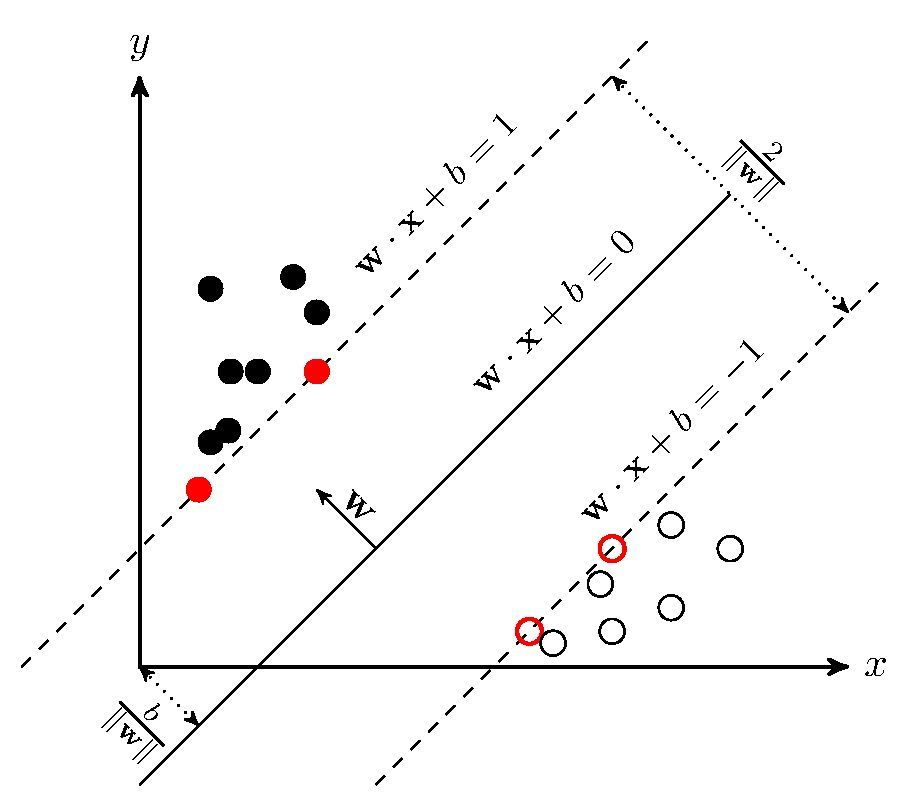

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from my_ml_tools.my_ml_plot import Plot_decision_multi_class
import warnings
warnings.simplefilter('ignore')
from IPython.display import Image
Image(filename = './charts/svm_2.jpg', width=400)

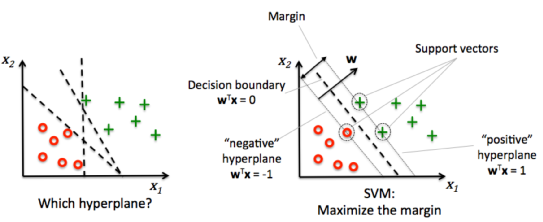

In [2]:
Image(filename = './charts/svm_4.png', width=500)

Test score = 1.00
Test score = 0.82


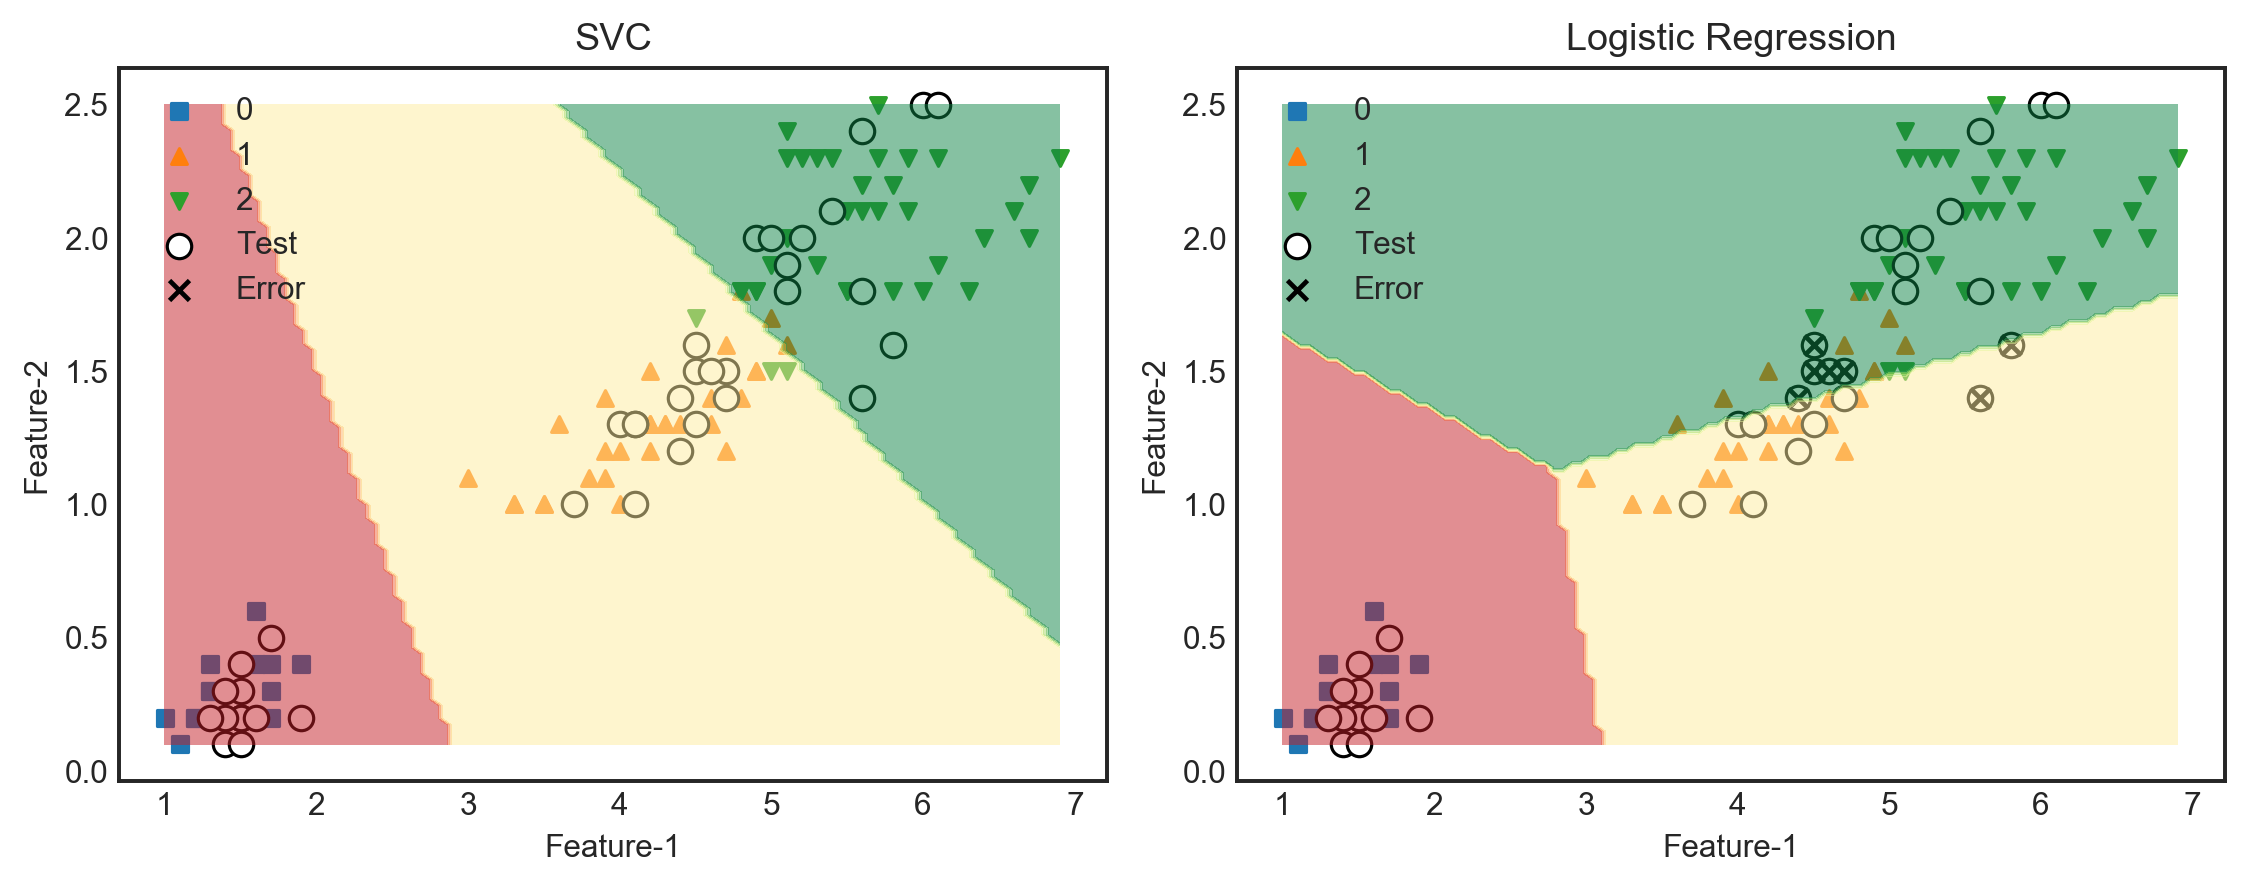

In [3]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X = X[:, 2:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1, random_state=0)
clf.fit(X_train, y_train)
Plot_decision_multi_class(clf, X_train, X_test, y_train, y_test, ax=axes[0])
axes[0].set_title('SVC')

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
Plot_decision_multi_class(clf, X_train, X_test, y_train, y_test, ax=axes[1])
axes[1].set_title('Logistic Regression')
plt.tight_layout()
plt.savefig('fig.png', dpi=220)

### C : float, optional (default=1.0)
- Penalty parameter C of the error term.
- Small value for C: increase model's 'bias' and decrease model's 'variance'

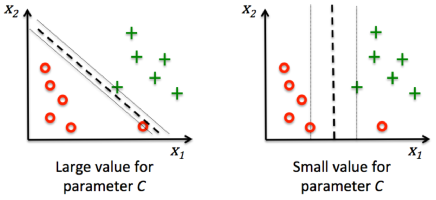

In [4]:
Image(filename = './charts/svm_3.png', width=400)

Test score = 1.00
Test score = 1.00
Test score = 0.95


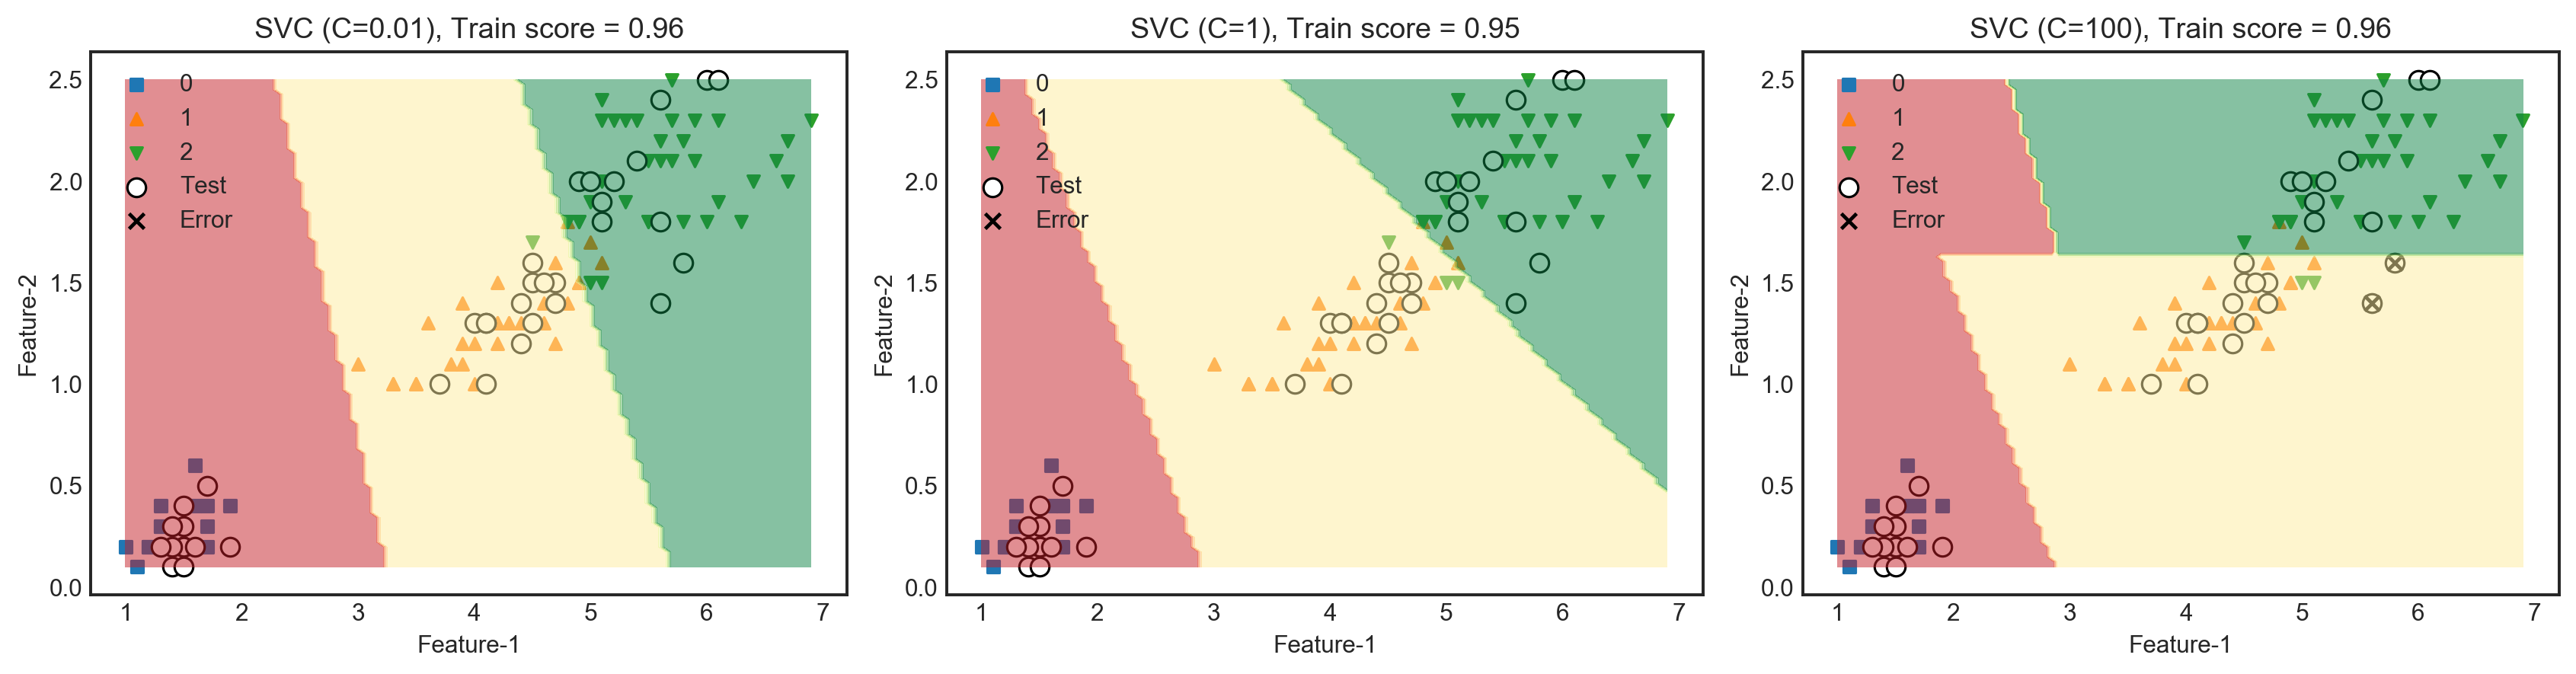

In [5]:
fig, axes = plt.subplots(1, 3, dpi=227, figsize=(15, 4))

for ax, C in zip(axes, [0.01, 1, 100]):
    clf = SVC(kernel='linear', C=C, random_state=0)
    clf.fit(X_train, y_train)
    Plot_decision_multi_class(clf, X_train, X_test, y_train, y_test, ax=ax)
    ax.set_title(f'SVC (C={C}), Train score = {clf.score(X_train, y_train):.2f}')
plt.tight_layout()
plt.savefig('fig.png', dpi=220)

## Kernel SVM
- ### Support non-linear data
- ### SVM with polynomial kernel visualization
https://youtu.be/3liCbRZPrZA

- ### SVM hyperparameters:   

> - C : float, optional (default=1.0)
Penalty parameter C of the error term.

> - kernel : string, optional (default=’rbf’)
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

> - degree : int, optional (default=3)
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

> - gamma : float, optional (default=’auto’)
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.    
>> Current default is ‘auto’ which uses 1 / n_features, if gamma='scale' is passed then it uses 1 / (n_features * X.std()) as value of gamma. The current default of gamma, ‘auto’, will change to ‘scale’ in version 0.22. ‘auto_deprecated’, a deprecated version of ‘auto’ is used as a default indicating that no explicit value of gamma was passed.    
>> (Larger gamma value will result in a tighter and bumpier decision boundary.)

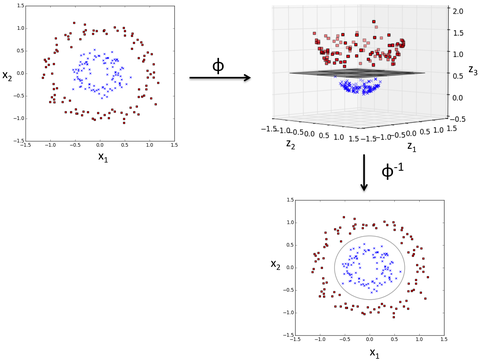

In [6]:
Image(filename = './charts/kernelized_svm_1.png', width=500)

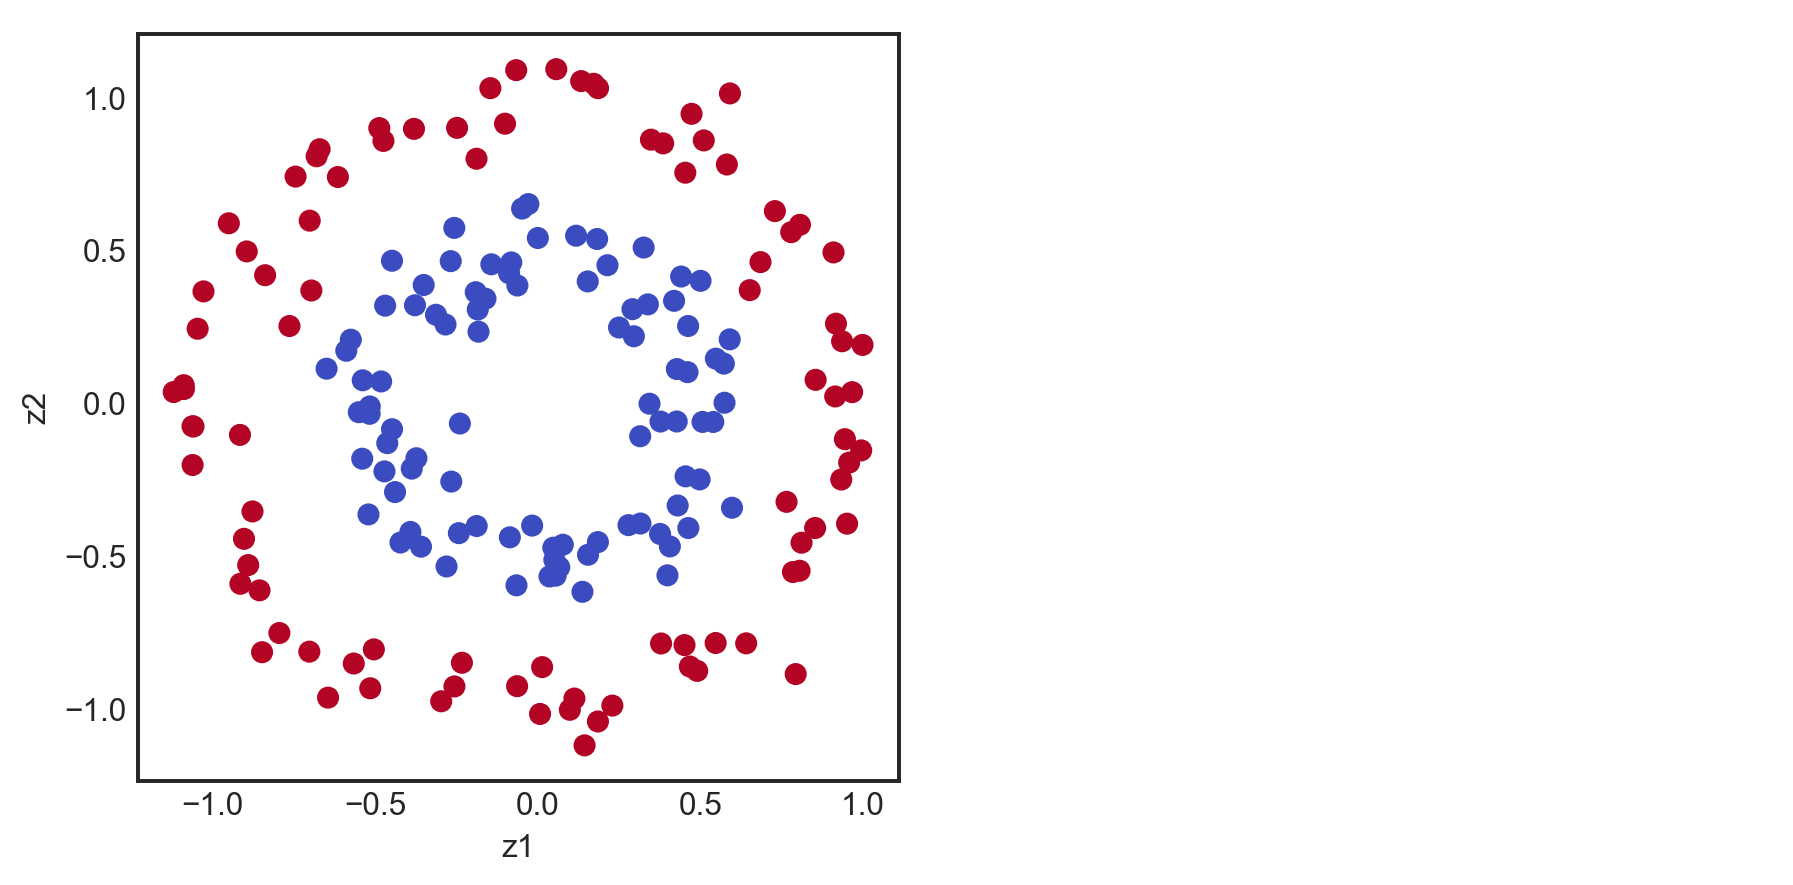

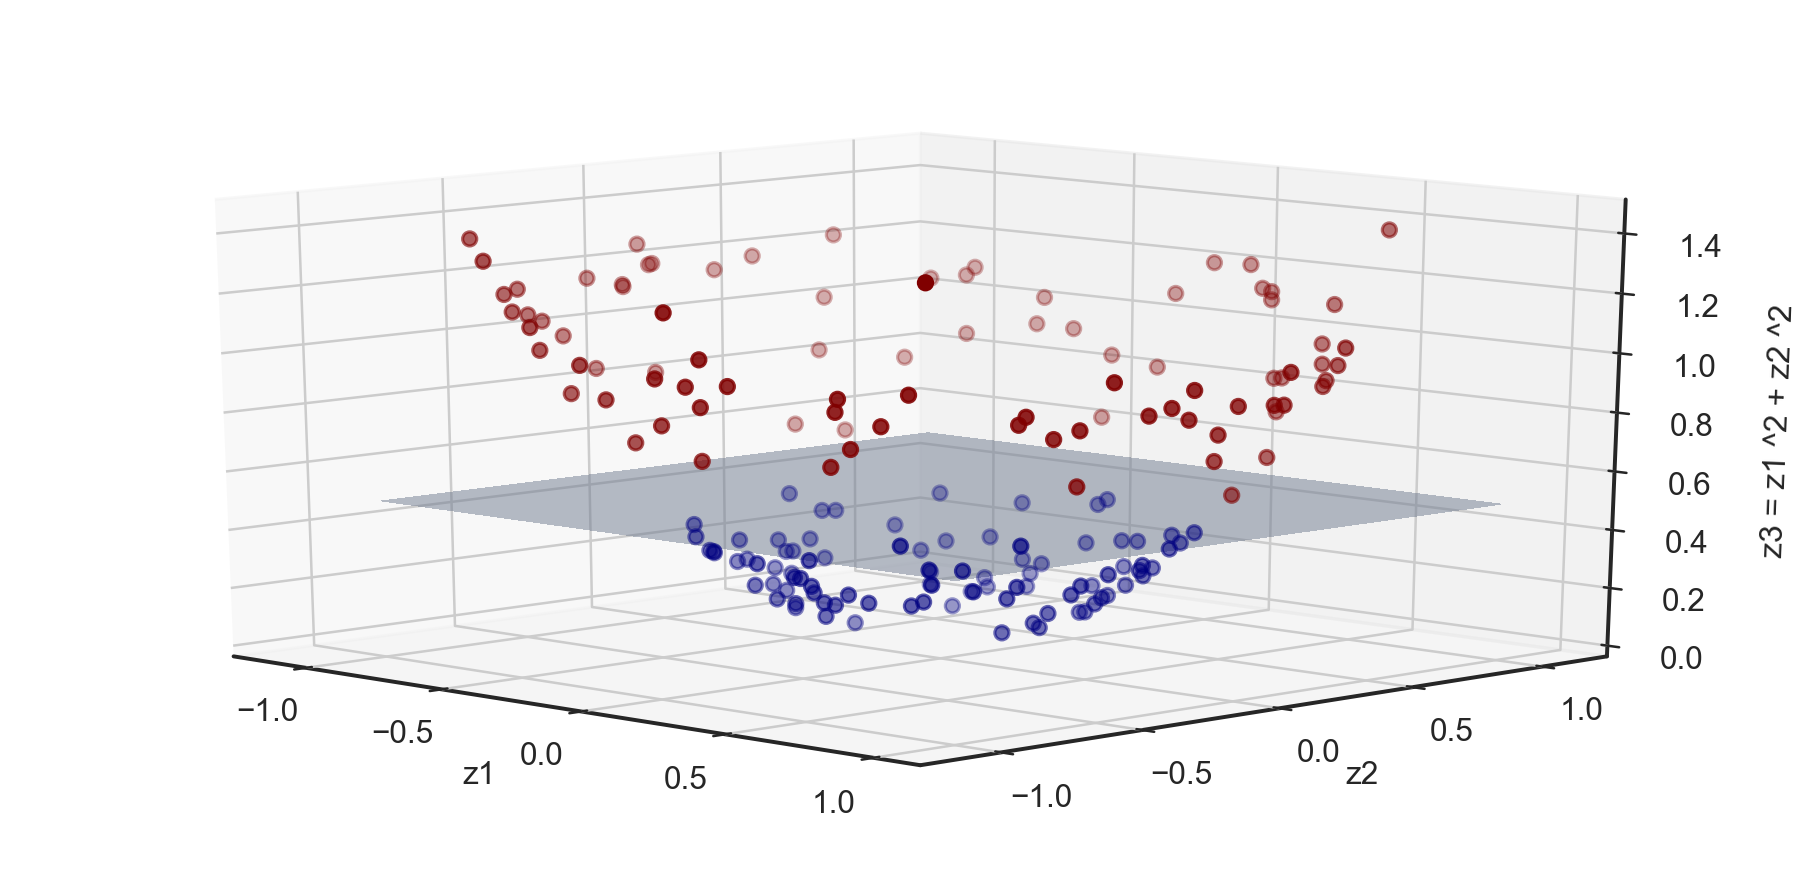

In [7]:
df = pd.read_csv('./data/svm_data_1.csv')
z1 = df['x1']
z2 = df['x2']
z3 = np.square(z1) + np.square(z2)
y = df['y']

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(8, 4))
axes[0].scatter(z1, z2, c=y, cmap=plt.cm.coolwarm)
axes[0].set_xlabel('z1')
axes[0].set_ylabel('z2')
axes[1].axis('off')
plt.tight_layout()
plt.savefig('fig.png', dpi=220)
plt.show()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(dpi=227, figsize=(8, 4))
ax = plt.gca(projection='3d')
ax.scatter(z1, z2, z3, c=y, cmap=plt.cm.jet)
xx, yy = np.meshgrid(
    np.linspace(-1, 1, 100),
    np.linspace(-1, 1, 100)
)
ax.contourf(xx, yy, 0.5 * np.ones(xx.size).reshape(xx.shape), cmap=plt.cm.bone, alpha=0.5)
ax.set_xlabel('z1')
ax.set_ylabel('z2')
ax.set_zlabel('z3 = z1 ^2 + z2 ^2', rotation=90)
ax.view_init(elev=15, azim=-45)
plt.tight_layout()
plt.savefig('fig.png', dpi=220)

Default gamma value = 0.96
Test score = 0.50
Test score = 0.50
Test score = 0.50
Test score = 0.50
Test score = 0.87
Test score = 0.87
Test score = 0.73
Test score = 0.87
Test score = 0.70


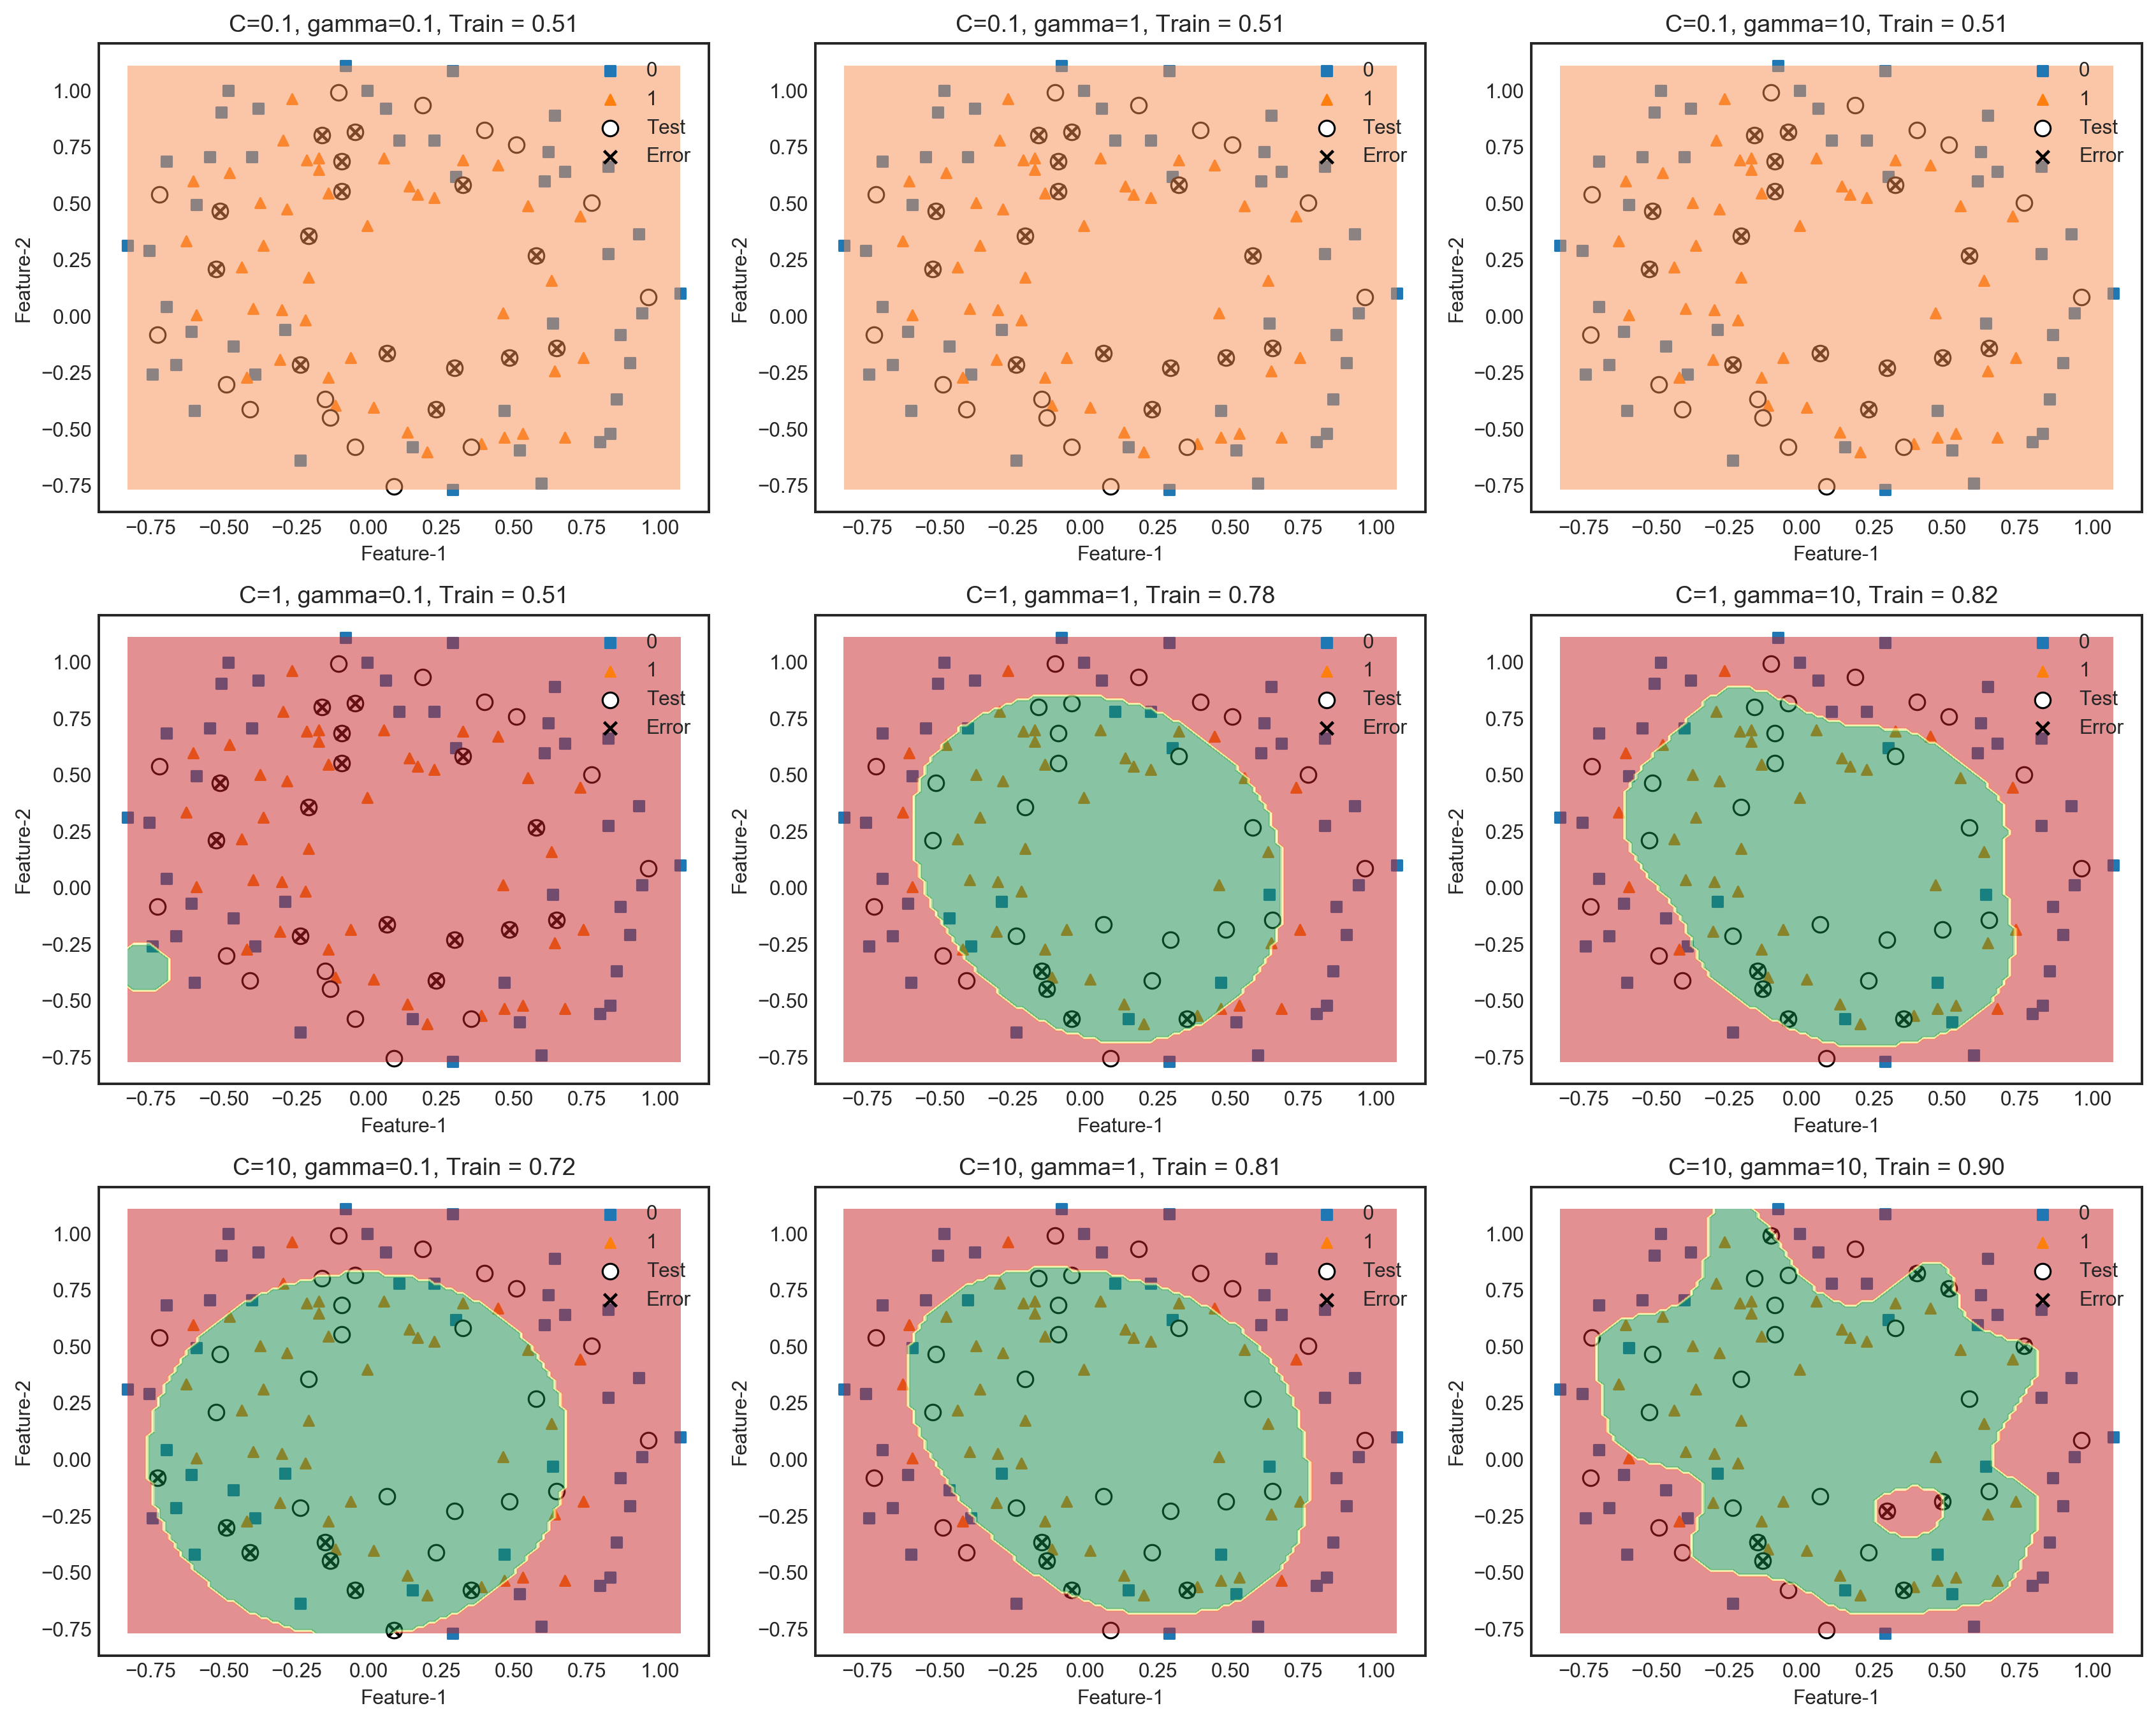

In [8]:
data = np.loadtxt('./data/ex2data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2].astype(np.int)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

fig, axes = plt.subplots(3, 3, dpi=227, figsize=(15, 12))

print(f'Default gamma value = {1 / (X_train.shape[1] * X_train.std()):.2f}')

for i, C in enumerate([0.1, 1, 10]):
    for j, gamma in enumerate([0.1, 1, 10]):
        clf = SVC(kernel='rbf', C=C, gamma=gamma, random_state=0)
        clf.fit(X_train, y_train)
        Plot_decision_multi_class(clf, X_train, X_test, y_train, y_test, ax=axes[i][j])
        axes[i][j].set_title(f'C={C}, gamma={gamma}, Train = {clf.score(X_train, y_train):.2f}')
plt.tight_layout()
plt.savefig('fig.png', dpi=220)

In [9]:
def get_best_model_and_accuracy(model, params, X, y):
    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(model, params, error_score=0, cv=5, n_jobs=-1)
    grid.fit(X, y)
    print(f"Best accuracy: {grid.best_score_:.3f}")
    print(f"Best parameters: {grid.best_params_}")
    print(f"Avg. time to fit: {grid.cv_results_['mean_fit_time'].mean():.3f}")
    print(f"Avg. time to predict: {grid.cv_results_['mean_score_time'].mean():.3f}")

In [10]:
from sklearn.pipeline import Pipeline

svc = SVC()
model = Pipeline([
    ('clf', svc)
])

params = {
    'clf__kernel': ['poly', 'rbf', 'linear'],
    'clf__C': [0.1, 1, 10],
    'clf__gamma': [0.1, 1, 10],
    'clf__degree': [1, 3, 5]
}

get_best_model_and_accuracy(model, params, X, y)

Best accuracy: 0.695
Best parameters: {'clf__C': 10, 'clf__degree': 1, 'clf__gamma': 1, 'clf__kernel': 'rbf'}
Avg. time to fit: 0.038
Avg. time to predict: 0.000


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [11]:
svc = SVC()
model = Pipeline([
    ('clf', svc)
])

params = {
    'clf__kernel': ['rbf'],
    'clf__C': [100, 1e3, 1e4],
    'clf__gamma': [0.01, 0.1, 1, 10],
}

get_best_model_and_accuracy(model, params, X, y)

Best accuracy: 0.720
Best parameters: {'clf__C': 1000.0, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
Avg. time to fit: 0.002
Avg. time to predict: 0.000


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [12]:
svc = SVC(kernel='rbf', C=1e3, gamma=0.1)
svc.fit(X_train, y_train)
print(f"Training score: {clf.score(X_train, y_train):.2f}")
print(f"Testing score: {clf.score(X_test, y_test):.2f}")

Training score: 0.90
Testing score: 0.70
